In [3]:
from tensorflow.keras.models import load_model

model_files = ['vggv2.keras', 'RESNET2.keras', 'Inception3v2.keras', 'weights.keras']

models = [load_model(file) for file in model_files]

In [4]:
for model in models:
    model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,867,381 (68.16 MB)

 Trainable params: 1,050,897 (4.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,101,796 (8.02 MB)

Model: "sequential_349"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_349 (Flatten)           │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_698 (Dense)               │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_349 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_699 (Dense)               │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,177,589 (138.01 MB)

 Trainable params: 4,196,625 (16.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 8,393,252 (32.02 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 2, 2, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,955,477 (95.20 MB)

 Trainable params: 1,050,897 (4.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 2,101,796 (8.02 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,548,056 (17.35 MB)

 Trainable params: 166,161 (649.07 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 332,324 (1.27 MB)

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import fbeta_score
import numpy as np # linear algebra
# version of panda should be 0.25.1 because of .ix function
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# pip install opencv-python
import cv2

# pip install tqdm
from tqdm import tqdm

from sklearn.model_selection import KFold
import time



In [6]:
x_train = []
x_test = []
y_train = []

df_train = pd.read_csv('./train_v2.csv')
# df_test = pd.read_csv('./dataset/sample_submission_v2.csv')

flatten = lambda l: [item for sublist in l for item in sublist]
labels = list(set(flatten([l.split(' ') for l in df_train['tags'].values])))




In [7]:
labels = ['blow_down',
          'bare_ground',
          'conventional_mine',
          'blooming',
          'cultivation',
          'artisinal_mine',
          'haze',
          'primary',
          'slash_burn',
          'habitation',
          'clear',
          'road',
          'selective_logging',
          'partly_cloudy',
          'agriculture',
          'water',
          'cloudy']

label_map = {'agriculture': 14,
             'artisinal_mine': 5,
             'bare_ground': 1,
             'blooming': 3,
             'blow_down': 0,
             'clear': 10,
             'cloudy': 16,
             'conventional_mine': 2,
             'cultivation': 4,
             'habitation': 9,
             'haze': 6,
             'partly_cloudy': 13,
             'primary': 7,
             'road': 11,
             'selective_logging': 12,
             'slash_burn': 8,
             'water': 15}

for f, tags in tqdm(df_train.values[:9800], miniters=1000):
    print('./train-jpg/train-jpg/{}.jpg'.format(f))
    img = cv2.imread('./train-jpg/{}.jpg'.format(f))
    targets = np.zeros(17)
    for t in tags.split(' '):
        targets[label_map[t]] = 1
    x_train.append(cv2.resize(img, (128, 128)))
    y_train.append(targets)


y_train = np.array(y_train, np.uint8)
x_train = np.array(x_train, np.float32) / 255.
# x_test = np.array(x_test, np.float32) / 255.

print(x_train.shape)
print(y_train.shape)



  0%|          | 0/9800 [00:00<?, ?it/s]

./train-jpg/train-jpg/train_0.jpg
./train-jpg/train-jpg/train_1.jpg
./train-jpg/train-jpg/train_2.jpg
./train-jpg/train-jpg/train_3.jpg
./train-jpg/train-jpg/train_4.jpg
./train-jpg/train-jpg/train_5.jpg
./train-jpg/train-jpg/train_6.jpg
./train-jpg/train-jpg/train_7.jpg
./train-jpg/train-jpg/train_8.jpg
./train-jpg/train-jpg/train_9.jpg
./train-jpg/train-jpg/train_10.jpg
./train-jpg/train-jpg/train_11.jpg
./train-jpg/train-jpg/train_12.jpg
./train-jpg/train-jpg/train_13.jpg
./train-jpg/train-jpg/train_14.jpg
./train-jpg/train-jpg/train_15.jpg
./train-jpg/train-jpg/train_16.jpg
./train-jpg/train-jpg/train_17.jpg
./train-jpg/train-jpg/train_18.jpg
./train-jpg/train-jpg/train_19.jpg
./train-jpg/train-jpg/train_20.jpg
./train-jpg/train-jpg/train_21.jpg
./train-jpg/train-jpg/train_22.jpg
./train-jpg/train-jpg/train_23.jpg
./train-jpg/train-jpg/train_24.jpg
./train-jpg/train-jpg/train_25.jpg
./train-jpg/train-jpg/train_26.jpg
./train-jpg/train-jpg/train_27.jpg
./train-jpg/train-jpg/train_28

 10%|█         | 1000/9800 [00:01<00:10, 846.89it/s]

./train-jpg/train-jpg/train_843.jpg
./train-jpg/train-jpg/train_844.jpg
./train-jpg/train-jpg/train_845.jpg
./train-jpg/train-jpg/train_846.jpg
./train-jpg/train-jpg/train_847.jpg
./train-jpg/train-jpg/train_848.jpg
./train-jpg/train-jpg/train_849.jpg
./train-jpg/train-jpg/train_850.jpg
./train-jpg/train-jpg/train_851.jpg
./train-jpg/train-jpg/train_852.jpg
./train-jpg/train-jpg/train_853.jpg
./train-jpg/train-jpg/train_854.jpg
./train-jpg/train-jpg/train_855.jpg
./train-jpg/train-jpg/train_856.jpg
./train-jpg/train-jpg/train_857.jpg
./train-jpg/train-jpg/train_858.jpg
./train-jpg/train-jpg/train_859.jpg
./train-jpg/train-jpg/train_860.jpg
./train-jpg/train-jpg/train_861.jpg
./train-jpg/train-jpg/train_862.jpg
./train-jpg/train-jpg/train_863.jpg
./train-jpg/train-jpg/train_864.jpg
./train-jpg/train-jpg/train_865.jpg
./train-jpg/train-jpg/train_866.jpg
./train-jpg/train-jpg/train_867.jpg
./train-jpg/train-jpg/train_868.jpg
./train-jpg/train-jpg/train_869.jpg
./train-jpg/train-jpg/train_

 20%|██        | 2000/9800 [00:02<00:08, 867.33it/s]

./train-jpg/train-jpg/train_1915.jpg
./train-jpg/train-jpg/train_1916.jpg
./train-jpg/train-jpg/train_1917.jpg
./train-jpg/train-jpg/train_1918.jpg
./train-jpg/train-jpg/train_1919.jpg
./train-jpg/train-jpg/train_1920.jpg
./train-jpg/train-jpg/train_1921.jpg
./train-jpg/train-jpg/train_1922.jpg
./train-jpg/train-jpg/train_1923.jpg
./train-jpg/train-jpg/train_1924.jpg
./train-jpg/train-jpg/train_1925.jpg
./train-jpg/train-jpg/train_1926.jpg
./train-jpg/train-jpg/train_1927.jpg
./train-jpg/train-jpg/train_1928.jpg
./train-jpg/train-jpg/train_1929.jpg
./train-jpg/train-jpg/train_1930.jpg
./train-jpg/train-jpg/train_1931.jpg
./train-jpg/train-jpg/train_1932.jpg
./train-jpg/train-jpg/train_1933.jpg
./train-jpg/train-jpg/train_1934.jpg
./train-jpg/train-jpg/train_1935.jpg
./train-jpg/train-jpg/train_1936.jpg
./train-jpg/train-jpg/train_1937.jpg
./train-jpg/train-jpg/train_1938.jpg
./train-jpg/train-jpg/train_1939.jpg
./train-jpg/train-jpg/train_1940.jpg
./train-jpg/train-jpg/train_1941.jpg
.

 31%|███       | 3000/9800 [00:03<00:07, 853.56it/s]

./train-jpg/train-jpg/train_2915.jpg
./train-jpg/train-jpg/train_2916.jpg
./train-jpg/train-jpg/train_2917.jpg
./train-jpg/train-jpg/train_2918.jpg
./train-jpg/train-jpg/train_2919.jpg
./train-jpg/train-jpg/train_2920.jpg
./train-jpg/train-jpg/train_2921.jpg
./train-jpg/train-jpg/train_2922.jpg
./train-jpg/train-jpg/train_2923.jpg
./train-jpg/train-jpg/train_2924.jpg
./train-jpg/train-jpg/train_2925.jpg
./train-jpg/train-jpg/train_2926.jpg
./train-jpg/train-jpg/train_2927.jpg
./train-jpg/train-jpg/train_2928.jpg
./train-jpg/train-jpg/train_2929.jpg
./train-jpg/train-jpg/train_2930.jpg
./train-jpg/train-jpg/train_2931.jpg
./train-jpg/train-jpg/train_2932.jpg
./train-jpg/train-jpg/train_2933.jpg
./train-jpg/train-jpg/train_2934.jpg
./train-jpg/train-jpg/train_2935.jpg
./train-jpg/train-jpg/train_2936.jpg
./train-jpg/train-jpg/train_2937.jpg
./train-jpg/train-jpg/train_2938.jpg
./train-jpg/train-jpg/train_2939.jpg
./train-jpg/train-jpg/train_2940.jpg
./train-jpg/train-jpg/train_2941.jpg
.

 41%|████      | 4000/9800 [00:04<00:06, 855.31it/s]

./train-jpg/train-jpg/train_3957.jpg
./train-jpg/train-jpg/train_3958.jpg
./train-jpg/train-jpg/train_3959.jpg
./train-jpg/train-jpg/train_3960.jpg
./train-jpg/train-jpg/train_3961.jpg
./train-jpg/train-jpg/train_3962.jpg
./train-jpg/train-jpg/train_3963.jpg
./train-jpg/train-jpg/train_3964.jpg
./train-jpg/train-jpg/train_3965.jpg
./train-jpg/train-jpg/train_3966.jpg
./train-jpg/train-jpg/train_3967.jpg
./train-jpg/train-jpg/train_3968.jpg
./train-jpg/train-jpg/train_3969.jpg
./train-jpg/train-jpg/train_3970.jpg
./train-jpg/train-jpg/train_3971.jpg
./train-jpg/train-jpg/train_3972.jpg
./train-jpg/train-jpg/train_3973.jpg
./train-jpg/train-jpg/train_3974.jpg
./train-jpg/train-jpg/train_3975.jpg
./train-jpg/train-jpg/train_3976.jpg
./train-jpg/train-jpg/train_3977.jpg
./train-jpg/train-jpg/train_3978.jpg
./train-jpg/train-jpg/train_3979.jpg
./train-jpg/train-jpg/train_3980.jpg
./train-jpg/train-jpg/train_3981.jpg
./train-jpg/train-jpg/train_3982.jpg
./train-jpg/train-jpg/train_3983.jpg
.

 51%|█████     | 5000/9800 [00:05<00:05, 847.05it/s]

./train-jpg/train-jpg/train_4954.jpg
./train-jpg/train-jpg/train_4955.jpg
./train-jpg/train-jpg/train_4956.jpg
./train-jpg/train-jpg/train_4957.jpg
./train-jpg/train-jpg/train_4958.jpg
./train-jpg/train-jpg/train_4959.jpg
./train-jpg/train-jpg/train_4960.jpg
./train-jpg/train-jpg/train_4961.jpg
./train-jpg/train-jpg/train_4962.jpg
./train-jpg/train-jpg/train_4963.jpg
./train-jpg/train-jpg/train_4964.jpg
./train-jpg/train-jpg/train_4965.jpg
./train-jpg/train-jpg/train_4966.jpg
./train-jpg/train-jpg/train_4967.jpg
./train-jpg/train-jpg/train_4968.jpg
./train-jpg/train-jpg/train_4969.jpg
./train-jpg/train-jpg/train_4970.jpg
./train-jpg/train-jpg/train_4971.jpg
./train-jpg/train-jpg/train_4972.jpg
./train-jpg/train-jpg/train_4973.jpg
./train-jpg/train-jpg/train_4974.jpg
./train-jpg/train-jpg/train_4975.jpg
./train-jpg/train-jpg/train_4976.jpg
./train-jpg/train-jpg/train_4977.jpg
./train-jpg/train-jpg/train_4978.jpg
./train-jpg/train-jpg/train_4979.jpg
./train-jpg/train-jpg/train_4980.jpg
.

 61%|██████    | 6000/9800 [00:07<00:04, 837.25it/s]

./train-jpg/train-jpg/train_5948.jpg
./train-jpg/train-jpg/train_5949.jpg
./train-jpg/train-jpg/train_5950.jpg
./train-jpg/train-jpg/train_5951.jpg
./train-jpg/train-jpg/train_5952.jpg
./train-jpg/train-jpg/train_5953.jpg
./train-jpg/train-jpg/train_5954.jpg
./train-jpg/train-jpg/train_5955.jpg
./train-jpg/train-jpg/train_5956.jpg
./train-jpg/train-jpg/train_5957.jpg
./train-jpg/train-jpg/train_5958.jpg
./train-jpg/train-jpg/train_5959.jpg
./train-jpg/train-jpg/train_5960.jpg
./train-jpg/train-jpg/train_5961.jpg
./train-jpg/train-jpg/train_5962.jpg
./train-jpg/train-jpg/train_5963.jpg
./train-jpg/train-jpg/train_5964.jpg
./train-jpg/train-jpg/train_5965.jpg
./train-jpg/train-jpg/train_5966.jpg
./train-jpg/train-jpg/train_5967.jpg
./train-jpg/train-jpg/train_5968.jpg
./train-jpg/train-jpg/train_5969.jpg
./train-jpg/train-jpg/train_5970.jpg
./train-jpg/train-jpg/train_5971.jpg
./train-jpg/train-jpg/train_5972.jpg
./train-jpg/train-jpg/train_5973.jpg
./train-jpg/train-jpg/train_5974.jpg
.

 71%|███████▏  | 7000/9800 [00:08<00:03, 828.09it/s]

./train-jpg/train-jpg/train_6929.jpg
./train-jpg/train-jpg/train_6930.jpg
./train-jpg/train-jpg/train_6931.jpg
./train-jpg/train-jpg/train_6932.jpg
./train-jpg/train-jpg/train_6933.jpg
./train-jpg/train-jpg/train_6934.jpg
./train-jpg/train-jpg/train_6935.jpg
./train-jpg/train-jpg/train_6936.jpg
./train-jpg/train-jpg/train_6937.jpg
./train-jpg/train-jpg/train_6938.jpg
./train-jpg/train-jpg/train_6939.jpg
./train-jpg/train-jpg/train_6940.jpg
./train-jpg/train-jpg/train_6941.jpg
./train-jpg/train-jpg/train_6942.jpg
./train-jpg/train-jpg/train_6943.jpg
./train-jpg/train-jpg/train_6944.jpg
./train-jpg/train-jpg/train_6945.jpg
./train-jpg/train-jpg/train_6946.jpg
./train-jpg/train-jpg/train_6947.jpg
./train-jpg/train-jpg/train_6948.jpg
./train-jpg/train-jpg/train_6949.jpg
./train-jpg/train-jpg/train_6950.jpg
./train-jpg/train-jpg/train_6951.jpg
./train-jpg/train-jpg/train_6952.jpg
./train-jpg/train-jpg/train_6953.jpg
./train-jpg/train-jpg/train_6954.jpg
./train-jpg/train-jpg/train_6955.jpg
.

 82%|████████▏ | 8000/9800 [00:09<00:02, 817.05it/s]

./train-jpg/train-jpg/train_7888.jpg
./train-jpg/train-jpg/train_7889.jpg
./train-jpg/train-jpg/train_7890.jpg
./train-jpg/train-jpg/train_7891.jpg
./train-jpg/train-jpg/train_7892.jpg
./train-jpg/train-jpg/train_7893.jpg
./train-jpg/train-jpg/train_7894.jpg
./train-jpg/train-jpg/train_7895.jpg
./train-jpg/train-jpg/train_7896.jpg
./train-jpg/train-jpg/train_7897.jpg
./train-jpg/train-jpg/train_7898.jpg
./train-jpg/train-jpg/train_7899.jpg
./train-jpg/train-jpg/train_7900.jpg
./train-jpg/train-jpg/train_7901.jpg
./train-jpg/train-jpg/train_7902.jpg
./train-jpg/train-jpg/train_7903.jpg
./train-jpg/train-jpg/train_7904.jpg
./train-jpg/train-jpg/train_7905.jpg
./train-jpg/train-jpg/train_7906.jpg
./train-jpg/train-jpg/train_7907.jpg
./train-jpg/train-jpg/train_7908.jpg
./train-jpg/train-jpg/train_7909.jpg
./train-jpg/train-jpg/train_7910.jpg
./train-jpg/train-jpg/train_7911.jpg
./train-jpg/train-jpg/train_7912.jpg
./train-jpg/train-jpg/train_7913.jpg
./train-jpg/train-jpg/train_7914.jpg
.

 92%|█████████▏| 9000/9800 [00:10<00:00, 812.94it/s]

./train-jpg/train-jpg/train_8861.jpg
./train-jpg/train-jpg/train_8862.jpg
./train-jpg/train-jpg/train_8863.jpg
./train-jpg/train-jpg/train_8864.jpg
./train-jpg/train-jpg/train_8865.jpg
./train-jpg/train-jpg/train_8866.jpg
./train-jpg/train-jpg/train_8867.jpg
./train-jpg/train-jpg/train_8868.jpg
./train-jpg/train-jpg/train_8869.jpg
./train-jpg/train-jpg/train_8870.jpg
./train-jpg/train-jpg/train_8871.jpg
./train-jpg/train-jpg/train_8872.jpg
./train-jpg/train-jpg/train_8873.jpg
./train-jpg/train-jpg/train_8874.jpg
./train-jpg/train-jpg/train_8875.jpg
./train-jpg/train-jpg/train_8876.jpg
./train-jpg/train-jpg/train_8877.jpg
./train-jpg/train-jpg/train_8878.jpg
./train-jpg/train-jpg/train_8879.jpg
./train-jpg/train-jpg/train_8880.jpg
./train-jpg/train-jpg/train_8881.jpg
./train-jpg/train-jpg/train_8882.jpg
./train-jpg/train-jpg/train_8883.jpg
./train-jpg/train-jpg/train_8884.jpg
./train-jpg/train-jpg/train_8885.jpg
./train-jpg/train-jpg/train_8886.jpg
./train-jpg/train-jpg/train_8887.jpg
.

100%|██████████| 9800/9800 [00:11<00:00, 826.79it/s]

./train-jpg/train-jpg/train_9656.jpg
./train-jpg/train-jpg/train_9657.jpg
./train-jpg/train-jpg/train_9658.jpg
./train-jpg/train-jpg/train_9659.jpg
./train-jpg/train-jpg/train_9660.jpg
./train-jpg/train-jpg/train_9661.jpg
./train-jpg/train-jpg/train_9662.jpg
./train-jpg/train-jpg/train_9663.jpg
./train-jpg/train-jpg/train_9664.jpg
./train-jpg/train-jpg/train_9665.jpg
./train-jpg/train-jpg/train_9666.jpg
./train-jpg/train-jpg/train_9667.jpg
./train-jpg/train-jpg/train_9668.jpg
./train-jpg/train-jpg/train_9669.jpg
./train-jpg/train-jpg/train_9670.jpg
./train-jpg/train-jpg/train_9671.jpg
./train-jpg/train-jpg/train_9672.jpg
./train-jpg/train-jpg/train_9673.jpg
./train-jpg/train-jpg/train_9674.jpg
./train-jpg/train-jpg/train_9675.jpg
./train-jpg/train-jpg/train_9676.jpg
./train-jpg/train-jpg/train_9677.jpg
./train-jpg/train-jpg/train_9678.jpg
./train-jpg/train-jpg/train_9679.jpg
./train-jpg/train-jpg/train_9680.jpg
./train-jpg/train-jpg/train_9681.jpg
./train-jpg/train-jpg/train_9682.jpg
.

(9800, 128, 128, 3)
(9800, 17)


In [8]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print('Training data shape:', X_train.shape, Y_train.shape)
print('Validation data shape:', X_valid.shape, Y_valid.shape)

Training data shape: (7840, 128, 128, 3) (7840, 17)
Validation data shape: (1960, 128, 128, 3) (1960, 17)


62/62 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step


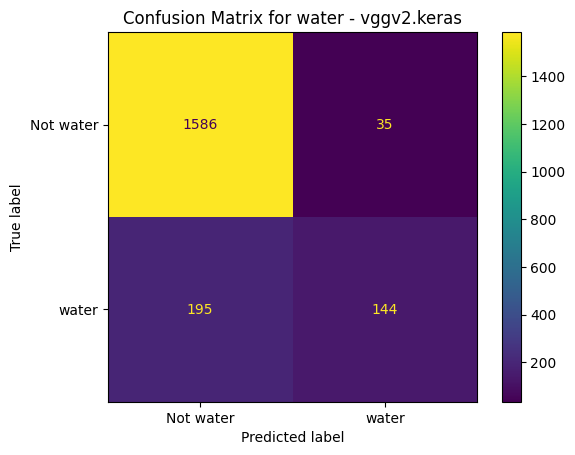

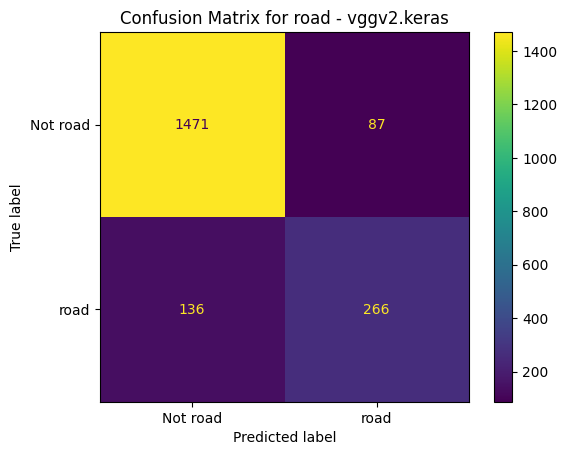

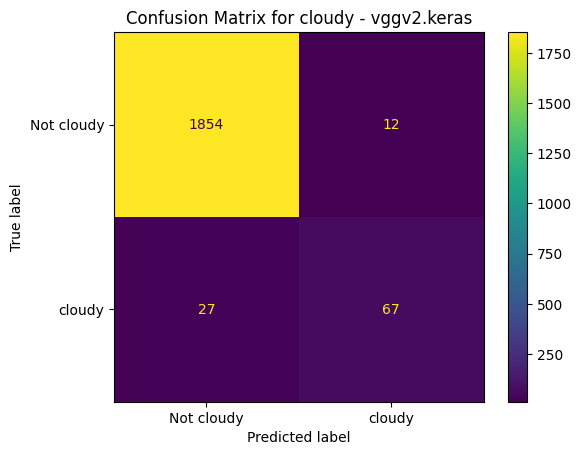

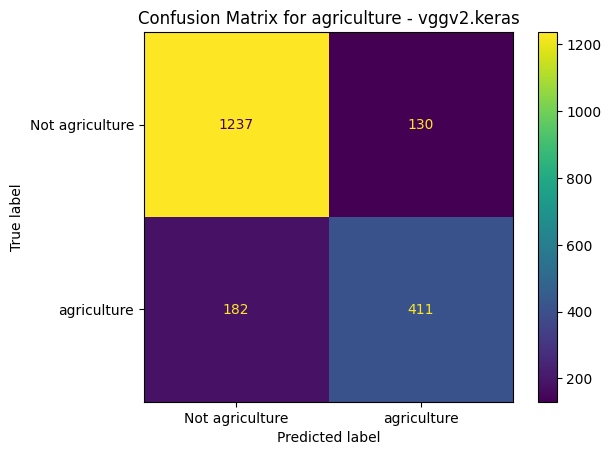

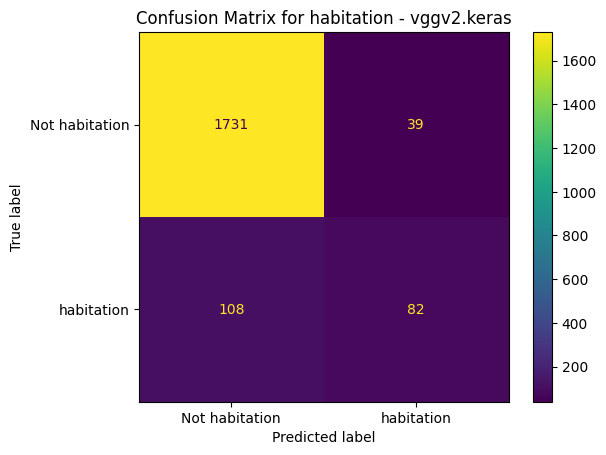

62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 471ms/step


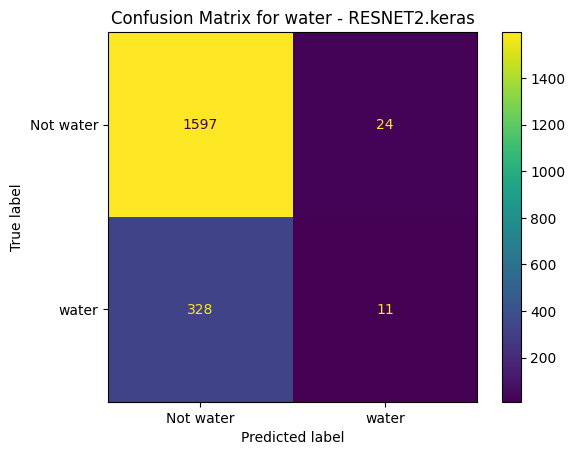

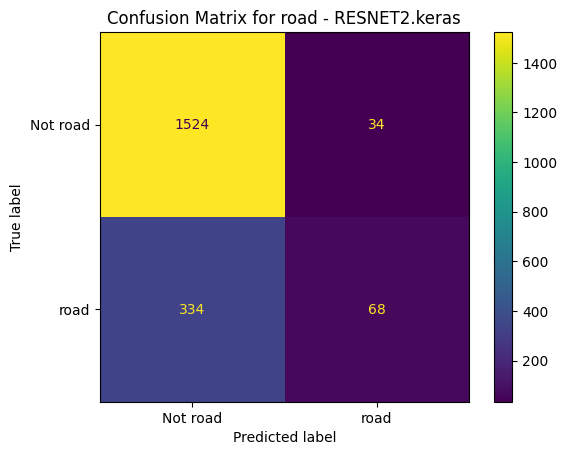

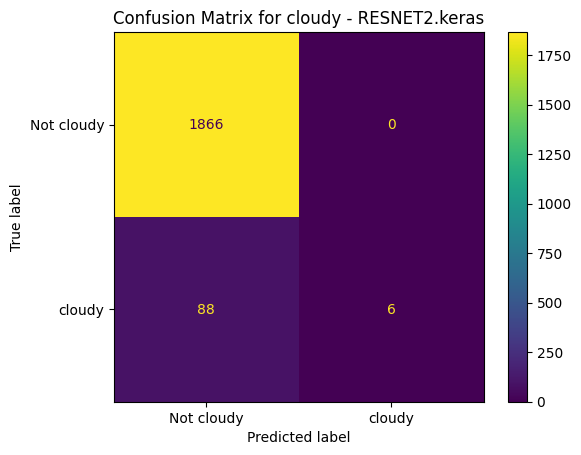

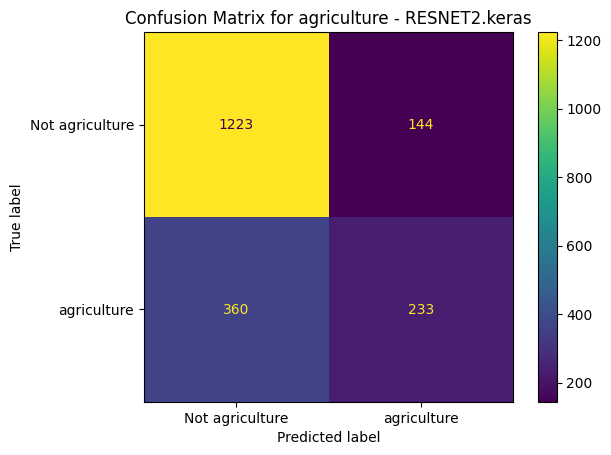

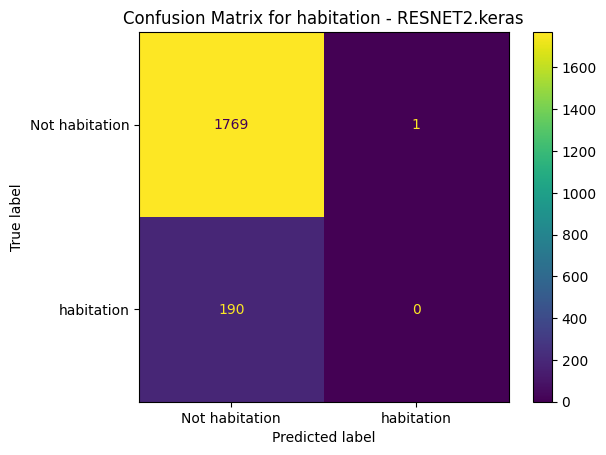

62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step


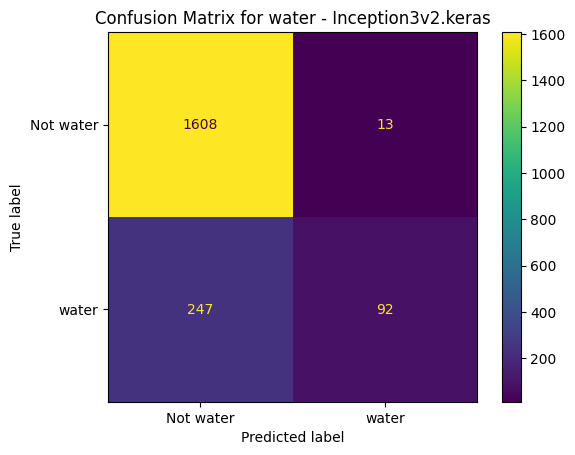

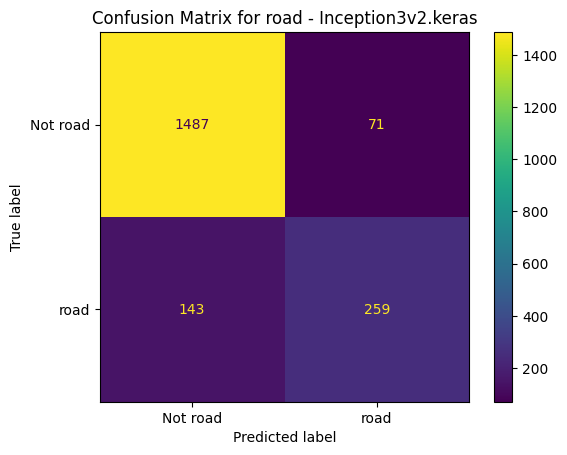

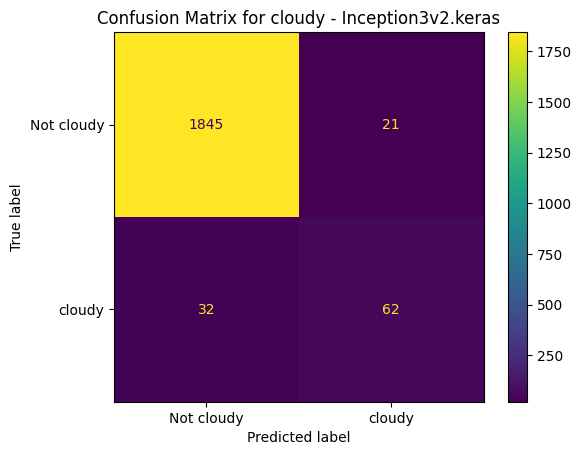

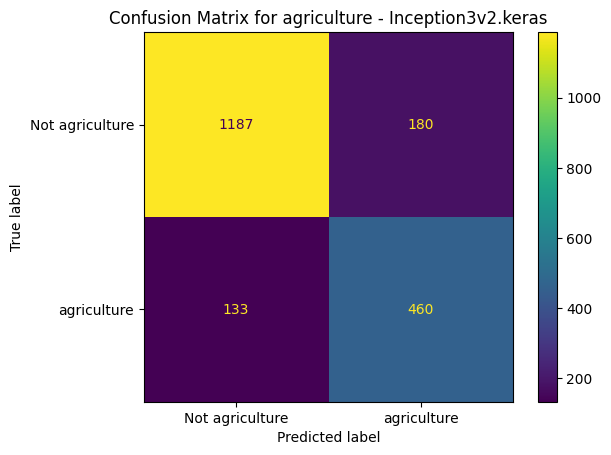

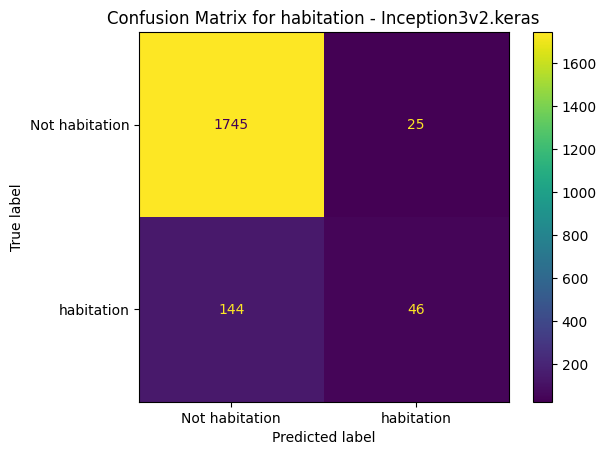

62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step


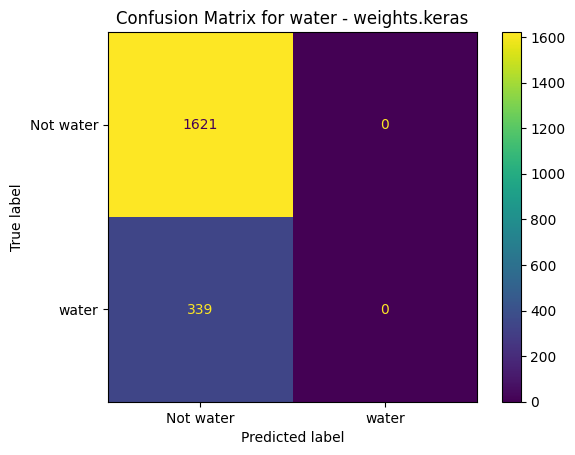

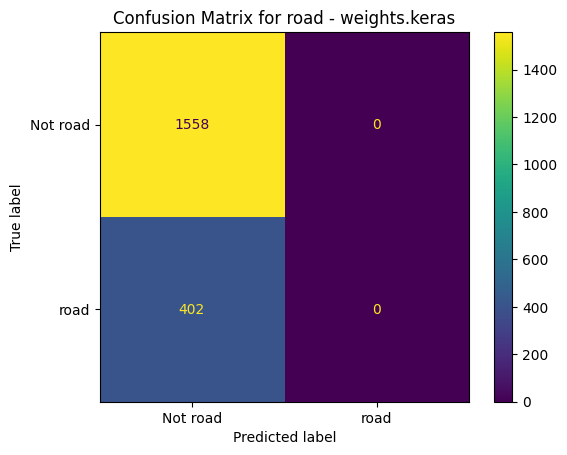

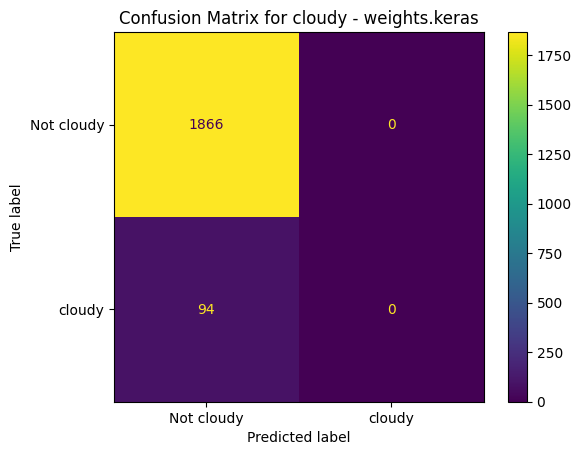

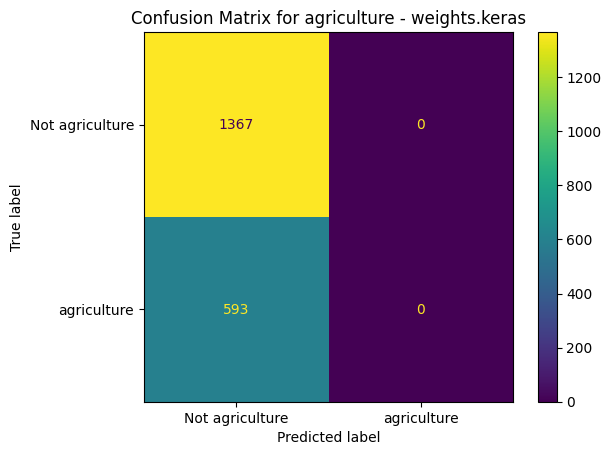

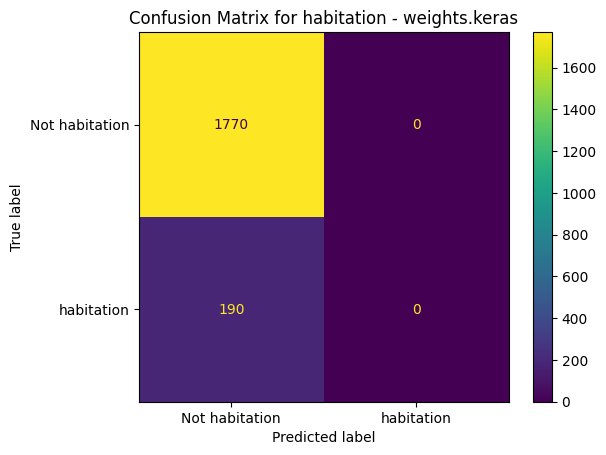

In [9]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, accuracy_score, multilabel_confusion_matrix


selected_classes = ['water', 'road', 'cloudy', 'agriculture', 'habitation']
selected_indices = [labels.index(label) for label in selected_classes]

results = {model_file: {'F1 Score': [], 'Accuracy': []} for model_file in model_files}

for model, model_file in zip(models, model_files):
    y_pred = model.predict(X_valid)
    y_pred = np.round(y_pred)  # Convert probabilities to 0 or 1
    
    mcm = multilabel_confusion_matrix(Y_valid, y_pred)
    for i, label in enumerate(labels):
        f1 = f1_score(Y_valid[:, i], y_pred[:, i])
        acc = accuracy_score(Y_valid[:, i], y_pred[:, i])
        
        results[model_file]['F1 Score'].append(f1)
        results[model_file]['Accuracy'].append(acc)
    for i in selected_indices:
        cm = mcm[i]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {labels[i]}', labels[i]])
        disp.plot()
        plt.title(f'Confusion Matrix for {labels[i]} - {model_file}')
        plt.show()